In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Eduardo Roger Silva Nascimento
# Desafio V

## Leitura dos dados

In [ ]:
filename = 'Planilha do desafio 5 - Ciência de dados.xlsx'
database_report = pd.read_excel(filename)

In [ ]:
database_report.head()

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
0,1.0,619.0,BA,Feminino,42.0,2.0,0.0,1.0,1.0,1.0,10134888.0,1.0
1,2.0,608.0,CE,Feminino,41.0,1.0,8380786.0,1.0,0.0,1.0,11254258.0,0.0
2,3.0,502.0,BA,Feminino,42.0,8.0,1596608.0,3.0,1.0,0.0,11393157.0,1.0
3,4.0,699.0,BA,Feminino,39.0,1.0,0.0,2.0,0.0,0.0,9382663.0,0.0
4,5.0,850.0,CE,Feminino,43.0,2.0,12551082.0,1.0,1.0,1.0,790841.0,0.0


### Informações sobre o dataframe

- 12 colunas
- 999 instâncias


In [ ]:
database_report.shape

(999, 12)

- Colunas Genero(Categórico) e Salario(Numérico) possuem valores nulos

In [ ]:
database_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    float64
 1   Pontos          999 non-null    float64
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    float64
 5   Bens            999 non-null    float64
 6   Saldo na Conta  999 non-null    float64
 7   Produto         999 non-null    float64
 8   Possui cartao   999 non-null    float64
 9   Ativo           999 non-null    float64
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    float64
dtypes: float64(10), object(2)
memory usage: 93.8+ KB


## Checando valores duplicados e os eliminando

In [ ]:
print(database_report.shape)
indices_to_keep = database_report.duplicated(keep='first').apply(lambda x: not x).to_numpy()
database_report = database_report.drop_duplicates(ignore_index=True).reset_index(drop=True)
print("Eliminando instancias duplidadas")
print(database_report.shape)


(999, 12)
Eliminando instancias duplidadas
(998, 12)


## Tratando valores nulos

In [ ]:
database_report.isnull().sum()

Id                0
Pontos            0
Estado            0
Genero            8
Idade             0
Bens              0
Saldo na Conta    0
Produto           0
Possui cartao     0
Ativo             0
Salario           7
Saiu              0
dtype: int64

Coluna Salario (Tipo numérico) - usando o método de interpolação linear para preencher valores faltantes

In [ ]:
database_report['Salario'] = database_report['Salario'].interpolate(method='linear')

Sem valores nulos na coluna salario

In [ ]:
database_report['Salario'].isnull().sum()

0

Coluna Gênero (Tipo categórico) - usando os dados mais frequentes

In [ ]:
database_report['Genero'].value_counts()

Masculino    521
Feminino     460
M              6
F              2
Fem            1
Name: Genero, dtype: int64

In [ ]:
database_report['Genero'].value_counts().idxmax()

'Masculino'

In [ ]:
genero_freq = database_report['Genero'].value_counts().idxmax()
database_report['Genero'].fillna(genero_freq, inplace=True)

Sem valores nulos na coluna genero

In [ ]:
database_report['Genero'].isnull().sum()

0

## Trocando alguns tipos de colunas que s'ao floats para inteiros

In [ ]:
database_report.dtypes

Id                float64
Pontos            float64
Estado             object
Genero             object
Idade             float64
Bens              float64
Saldo na Conta    float64
Produto           float64
Possui cartao     float64
Ativo             float64
Salario           float64
Saiu              float64
dtype: object

In [ ]:
columns_new_type = {"Id": "int64", "Idade": "int64", "Bens": "int64", "Produto": "int64"}
database_report = database_report.astype(columns_new_type)
database_report.dtypes

Id                  int64
Pontos            float64
Estado             object
Genero             object
Idade               int64
Bens                int64
Saldo na Conta    float64
Produto             int64
Possui cartao     float64
Ativo             float64
Salario           float64
Saiu              float64
dtype: object

## Corrigindo os dados categoricos

#### Genero

Verificando valores únicos

In [ ]:
database_report['Genero'].unique()

array(['Feminino', 'Masculino', 'M', 'F', 'Fem'], dtype=object)

Corrigir os dados categóricos "Mas" para "Masculino" e "Fem" para "Feminino"

In [ ]:
def fixing_genero(data):
    if data in ['Mas', 'M']:
        return 'Masculino'
    elif data in ['Fem', 'F']:
        return 'Feminino'
    return data

database_report['Genero'] = database_report['Genero'].apply(fixing_genero)


In [ ]:
database_report['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

#### Outros

In [ ]:
print(database_report['Estado'].unique())
print(database_report['Possui cartao'].unique())
print(database_report['Ativo'].unique())
print(database_report['Saiu'].unique())


['BA' 'CE' 'SP' 'MA' 'MG' 'RJ']
[1. 0.]
[1. 0.]
[1. 0.]


Trocando valores com 1 por 'Sim' e com '0' por 'Não'

In [ ]:
def changing_value_in_column(row):
    if row == 1:
        return 'Sim'
    return 'Não'

database_report['Possui cartao'] = database_report['Possui cartao'].apply(changing_value_in_column)
database_report['Ativo'] = database_report['Ativo'].apply(changing_value_in_column)
database_report['Saiu'] = database_report['Saiu'].apply(changing_value_in_column)



## Outliers

In [ ]:
database_report.describe()

,Id,Pontos,Idade,Bens,Saldo na Conta,Produto,Salario
count,998.000000,998.000000,998.000000,998.000000,9.980000e+02,998.000000,9.980000e+02
mean,501.337675,648.605210,38.907816,5.073146,7.162423e+06,1.526052,3.509896e+07
std,288.500953,98.312117,11.406570,2.926320,6.314508e+06,0.574293,5.289866e+08
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,9.677000e+03
25%,252.250000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,3.011010e+06
50%,501.500000,653.000000,37.000000,5.000000,8.926348e+06,1.000000,8.641742e+06
75%,750.750000,721.000000,44.000000,8.000000,1.258767e+07,2.000000,1.401381e+07
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.193469e+10


Histograma das colunas numéricas

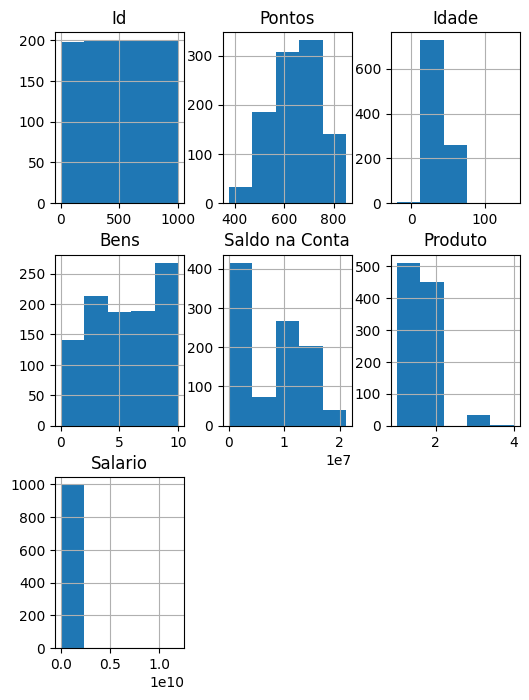

In [ ]:
hist = database_report.hist(bins=5, figsize=(6, 8))

Existem idades com valores pelo menos negativos, o desvio padrão da coluna Salario maior que a média e algumas colunas com alto desvio padrão, ou seja, maior irregularidade dos dados. Vamos removê-los

In [ ]:
def remove_outliers(df, debug=False):
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        if debug:
            print(f"col: {col}")
            print(f"Q1: {Q1}")
            print(f"Q3: {Q3}")
            print(f"IQR: {IQR}")
            print(f"lower_bound: {lower_bound}")
            print(f"upper_bound: {upper_bound}")
    return df.reset_index(drop=True)

In [ ]:
database_report = remove_outliers(database_report)

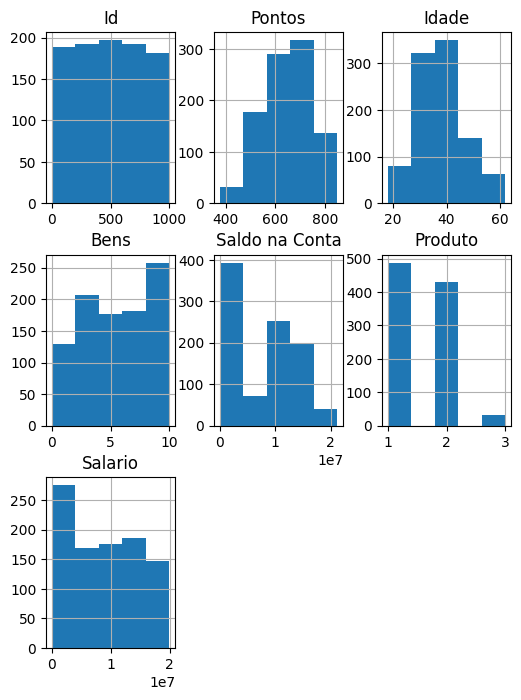

In [ ]:
hist = database_report.hist(bins=5, figsize=(6, 8))

## Dataset

In [ ]:
database_report.head()

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
0,1,619.0,BA,Feminino,42,2,0.0,1,Sim,Sim,10134888.0,Sim
1,2,608.0,CE,Feminino,41,1,8380786.0,1,Não,Sim,11254258.0,Não
2,3,502.0,BA,Feminino,42,8,1596608.0,3,Sim,Não,11393157.0,Sim
3,4,699.0,BA,Feminino,39,1,0.0,2,Não,Não,9382663.0,Não
4,5,850.0,CE,Feminino,43,2,12551082.0,1,Sim,Sim,790841.0,Não


In [ ]:
database_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              952 non-null    int64  
 1   Pontos          952 non-null    float64
 2   Estado          952 non-null    object 
 3   Genero          952 non-null    object 
 4   Idade           952 non-null    int64  
 5   Bens            952 non-null    int64  
 6   Saldo na Conta  952 non-null    float64
 7   Produto         952 non-null    int64  
 8   Possui cartao   952 non-null    object 
 9   Ativo           952 non-null    object 
 10  Salario         952 non-null    float64
 11  Saiu            952 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 89.4+ KB


## Gráficos

In [ ]:
def pie_chart(labels, values, title):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 7))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

### Porcentagem de clientes ativos

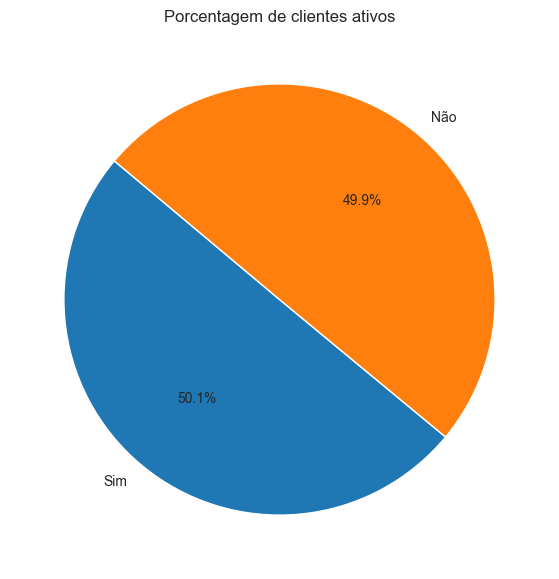

In [ ]:
pie_chart(database_report['Ativo'].unique(), list(database_report['Ativo'].value_counts()), "Porcentagem de clientes ativos")

## Análise só das contas ativas  e que não saiu

In [ ]:
contas_ativas = database_report[(database_report['Ativo'] == 'Sim') & (database_report['Saiu'] == 'Não')]

### Porcentagem de clientes com cartão

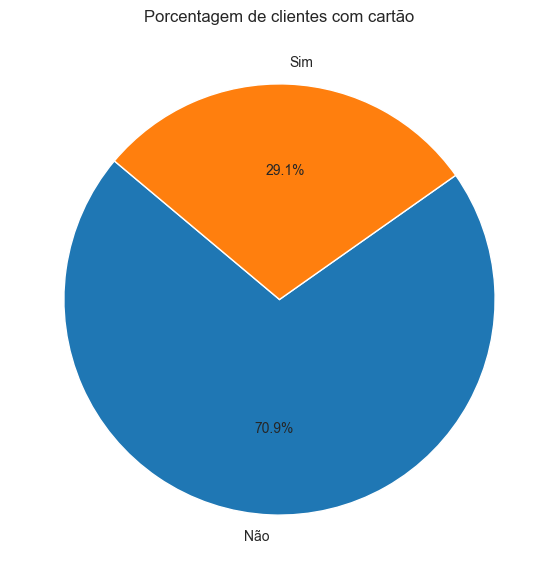

In [ ]:
pie_chart(contas_ativas['Possui cartao'].unique(), list(contas_ativas['Possui cartao'].value_counts()), "Porcentagem de clientes com cartão")

### Número de clientes por estado em gráfico de barras

In [ ]:
contas_ativas.groupby('Estado')['Id'].count().to_frame()

,Id
Estado,
BA,8
CE,209
MA,192
MG,4
RJ,4
SP,2


<Axes: xlabel='Estado'>

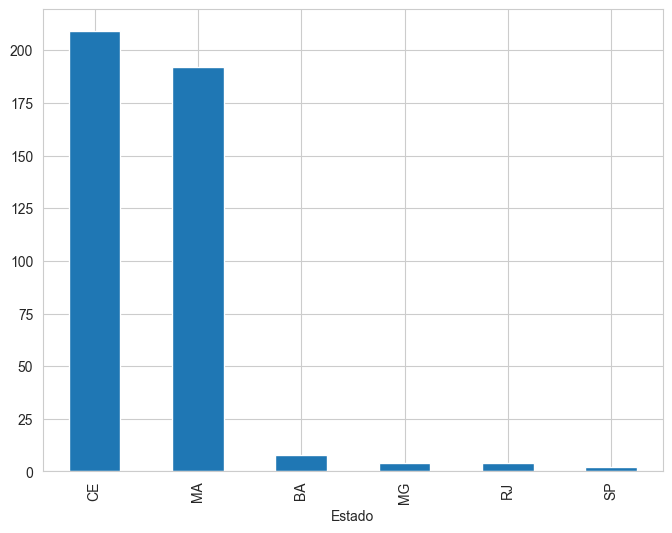

In [ ]:
contas_ativas.groupby('Estado')['Id'].count().sort_values(ascending=False).plot(kind='bar', figsize=(8, 6))

## Média salarial de clientes com saldo na conta por Produto

In [ ]:
filter_tem_saldo_na_conta = (contas_ativas['Saldo na Conta'] > 0)

In [ ]:
contas_ativas[filter_tem_saldo_na_conta].groupby('Produto')['Salario'].mean().sort_values(ascending=False).to_frame()

,Salario
Produto,
2,9.428948e+06
1,8.737131e+06


O Produto 3 não é um bom  produto. Clientes que escolheram esse produto ou não estão ativos ou ja saíram

## Análises com Gênero

#### Diferenças salariais

In [ ]:
contas_ativas.groupby('Genero')['Salario'].mean().sort_values(ascending=False).to_frame()

,Salario
Genero,
Masculino,9.284868e+06
Feminino,8.693256e+06


Homens tem maior salário

#### Gênero que consome mais produto

In [ ]:
contas_genero_produto = contas_ativas.groupby(['Genero', 'Produto'])[['Produto']].count().rename(columns={"Produto" : "Qtd Produto"}).reset_index()
contas_genero_produto

,Genero,Produto,Qtd Produto
0,Feminino,1,85
1,Feminino,2,88
2,Feminino,3,1
3,Masculino,1,116
4,Masculino,2,125
5,Masculino,3,4


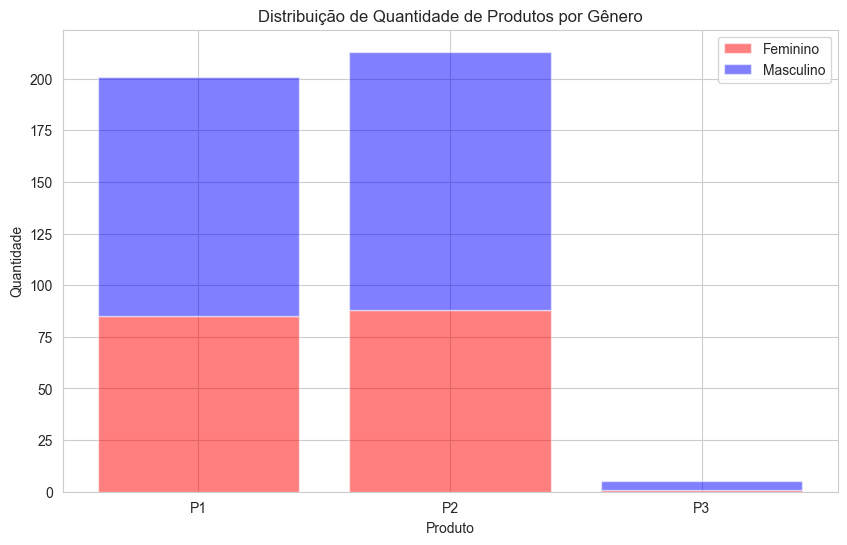

In [ ]:


feminino = contas_genero_produto[contas_genero_produto['Genero'] == 'Feminino']
masculino = contas_genero_produto[contas_genero_produto['Genero'] == 'Masculino']

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Definindo as barras para feminino e masculino
ax.bar('P' + feminino['Produto'].astype(str), feminino['Qtd Produto'], color='red', alpha=0.5, label='Feminino')
ax.bar('P' + masculino['Produto'].astype(str), masculino['Qtd Produto'], color='blue', alpha=0.5, label='Masculino', bottom=feminino['Qtd Produto'])

# Ajustando a orientação do eixo x
ax.set_xlabel('Produto')
ax.set_ylabel('Quantidade')
ax.set_title('Distribuição de Quantidade de Produtos por Gênero')
ax.legend()

Tanto as mulheres quanto os homens preferem o produto 1. Os homens preferem mais o produto 2 que as mulheres. Já o produto 3 é o menos escolhido, tanto por homens quanto pelas mulheres

#### Homens possuem mais bens que mulheres

In [ ]:
contas_ativas.groupby('Genero')['Bens'].sum().astype(int)

Genero
Feminino      848
Masculino    1202
Name: Bens, dtype: int32

## Analises das que possuem cartão por  faixa de idade

In [ ]:
contas_ativas['Idade'].describe()

count    419.000000
mean      37.544153
std        8.855017
min       19.000000
25%       31.000000
50%       36.000000
75%       42.000000
max       62.000000
Name: Idade, dtype: float64

In [ ]:
pd.cut(contas_ativas['Idade'], bins=4)

1        (40.5, 51.25]
4        (40.5, 51.25]
6        (40.5, 51.25]
7        (40.5, 51.25]
8      (18.957, 29.75]
            ...       
945      (40.5, 51.25]
948    (18.957, 29.75]
949      (40.5, 51.25]
950      (51.25, 62.0]
951    (18.957, 29.75]
Name: Idade, Length: 419, dtype: category
Categories (4, interval[float64, right]): [(18.957, 29.75] < (29.75, 40.5] < (40.5, 51.25] < (51.25, 62.0]]

In [ ]:
contas_ativas['Faixa de Idade'] = pd.cut(contas_ativas['Idade'], bins=4, labels=['Jovem-Adulto', 'Adulto', 'Meia Idade', 'Idoso'])

contas_ativas['Faixa de Idade']

C:\Users\rogerrsn\AppData\Local\Temp\ipykernel_41392\3163347067.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        Meia Idade
4        Meia Idade
6        Meia Idade
7        Meia Idade
8      Jovem-Adulto
           ...     
945      Meia Idade
948    Jovem-Adulto
949      Meia Idade
950           Idoso
951    Jovem-Adulto
Name: Faixa de Idade, Length: 419, dtype: category
Categories (4, object): ['Jovem-Adulto' < 'Adulto' < 'Meia Idade' < 'Idoso']

In [ ]:
dados_agrupados_por_faixa = contas_ativas.groupby(['Faixa de Idade'])[['Possui cartao']].count().reset_index()
# .reset_index().rename(columns={"Id": "Quantidade"})
dados_agrupados_por_faixa

,Faixa de Idade,Possui cartao
0,Jovem-Adulto,73
1,Adulto,209
2,Meia Idade,98
3,Idoso,39


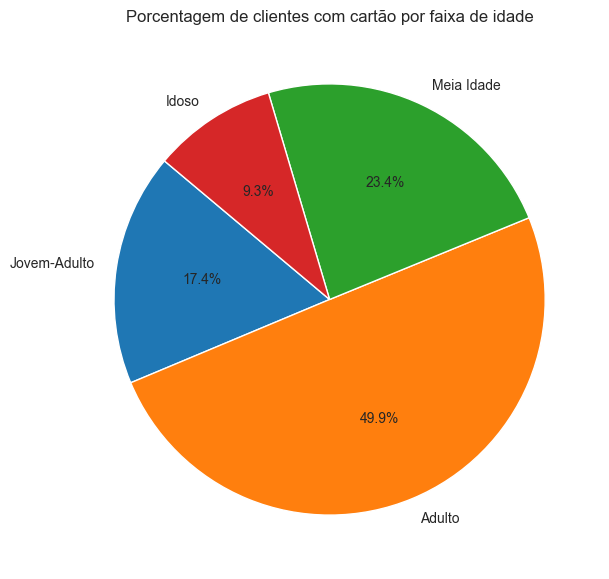

In [ ]:
pie_chart(dados_agrupados_por_faixa['Faixa de Idade'], dados_agrupados_por_faixa['Possui cartao'], "Porcentagem de clientes com cartão por faixa de idade")

## Média de pontos por estado

In [ ]:
media_pontos_estado = contas_ativas.groupby(['Estado'])[['Pontos']].mean().sort_values(by='Pontos',ascending=False).reset_index().rename(columns={"Pontos": "Média de Pontos"})
media_pontos_estado

,Estado,Média de Pontos
0,MG,701.750000
1,BA,694.625000
2,CE,659.339713
3,MA,651.536458
4,RJ,619.000000
5,SP,596.500000


In [ ]:
import plotly.express as px

In [ ]:
px.bar(data_frame=media_pontos_estado, x='Estado', y='Média de Pontos', title='Média de Pontos por Estado')

MG possui a maior média de pontos

## Lugares onde mais pessoas cujas contas estão encerradas


In [ ]:
contas_encerradas =  database_report[database_report['Saiu'] == 'Sim']
contas_encerradas_por_estado = contas_encerradas.groupby(['Estado'])[['Id']].count().sort_values(by='Id',ascending=False).reset_index().rename(columns={"Id": "Quantidade"})
contas_encerradas_por_estado

,Estado,Quantidade
0,CE,118
1,MA,69
2,BA,2
3,SP,1


In [ ]:
px.bar(data_frame=contas_encerradas_por_estado, x='Estado', y='Quantidade', title='Contas Encerradas por Estado')

Ceará e MA precisam de mais atenção